In [11]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [7]:
iris=pd.read_table("Iris.csv",sep=",")
print iris.shape
print iris.info()

(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
None


In [5]:
print iris.head()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


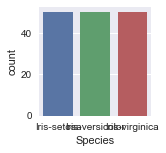

In [15]:
plt.figure(figsize=(2,2))
sns.countplot(iris.Species)

In [18]:
iris.drop("Id",axis=1, inplace=True)

In [19]:
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


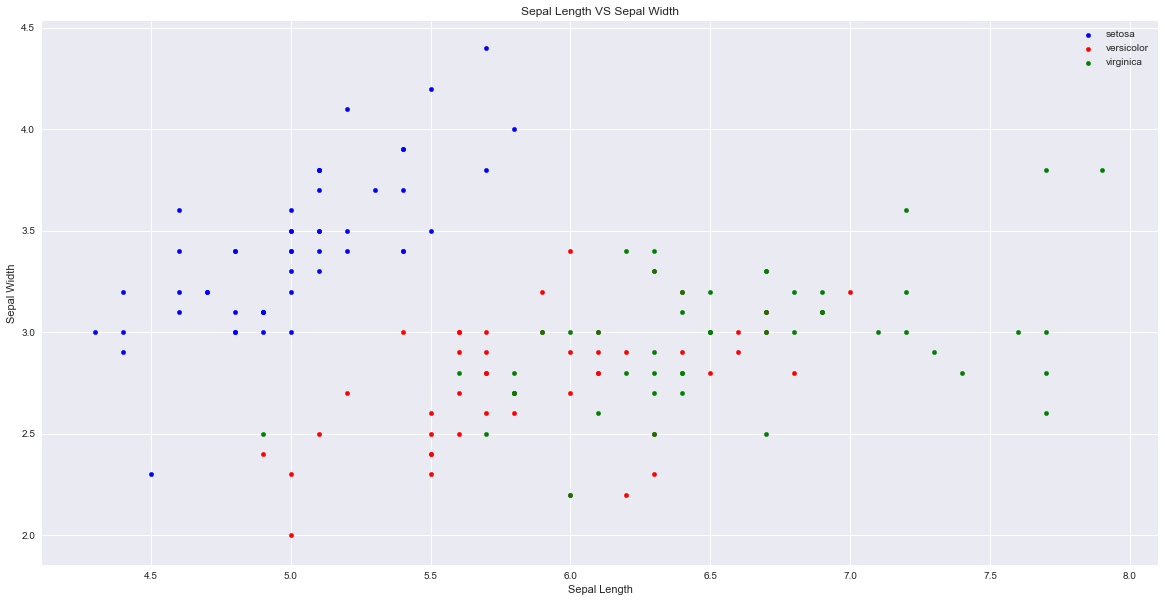

In [44]:
plt.figure(figsize=(50,30))
fig=iris[iris.Species =="Iris-setosa"].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label='setosa')
iris[iris.Species =="Iris-versicolor"].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label='versicolor',ax=fig)
iris[iris.Species =="Iris-virginica"].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label='virginica',ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Sepal Width")
fig=plt.gcf()
fig.set_size_inches(20,10)

plt.show()

In [33]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

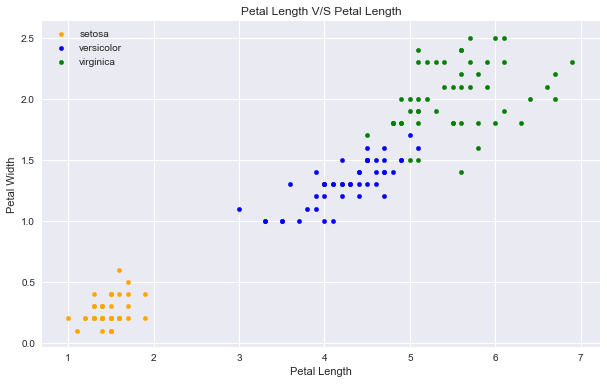

In [45]:
fig=iris[iris.Species=="Iris-setosa"].plot(x="PetalLengthCm",y="PetalWidthCm", kind='scatter', label="setosa", color="orange")
iris[iris.Species=="Iris-versicolor"].plot(label="versicolor", x="PetalLengthCm",y="PetalWidthCm", kind='scatter', ax=fig, color = "blue")
iris[iris.Species=="Iris-virginica"].plot(label="virginica", x="PetalLengthCm",y="PetalWidthCm", kind='scatter', ax=fig, color = "green")

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length V/S Petal Length")

fig=plt.gcf()
fig.set_size_inches(10,6)

plt.show()


In [46]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


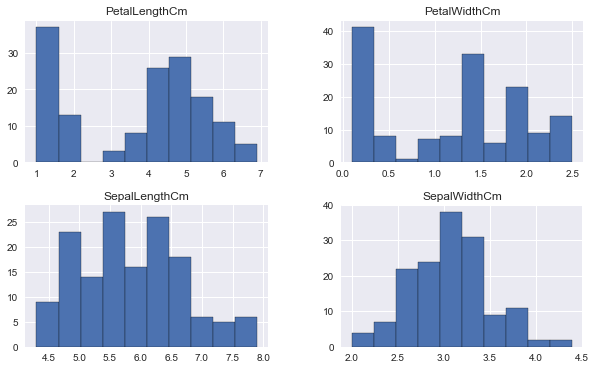

In [54]:
plt.figure(figsize=(30,20))
iris.hist(edgecolor="black")
fig=plt.gcf()
fig.set_size_inches(10,6)

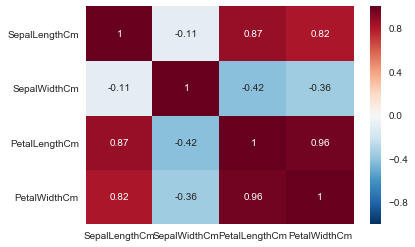

In [61]:
sns.heatmap(iris.corr(),annot=True)
plt.show()

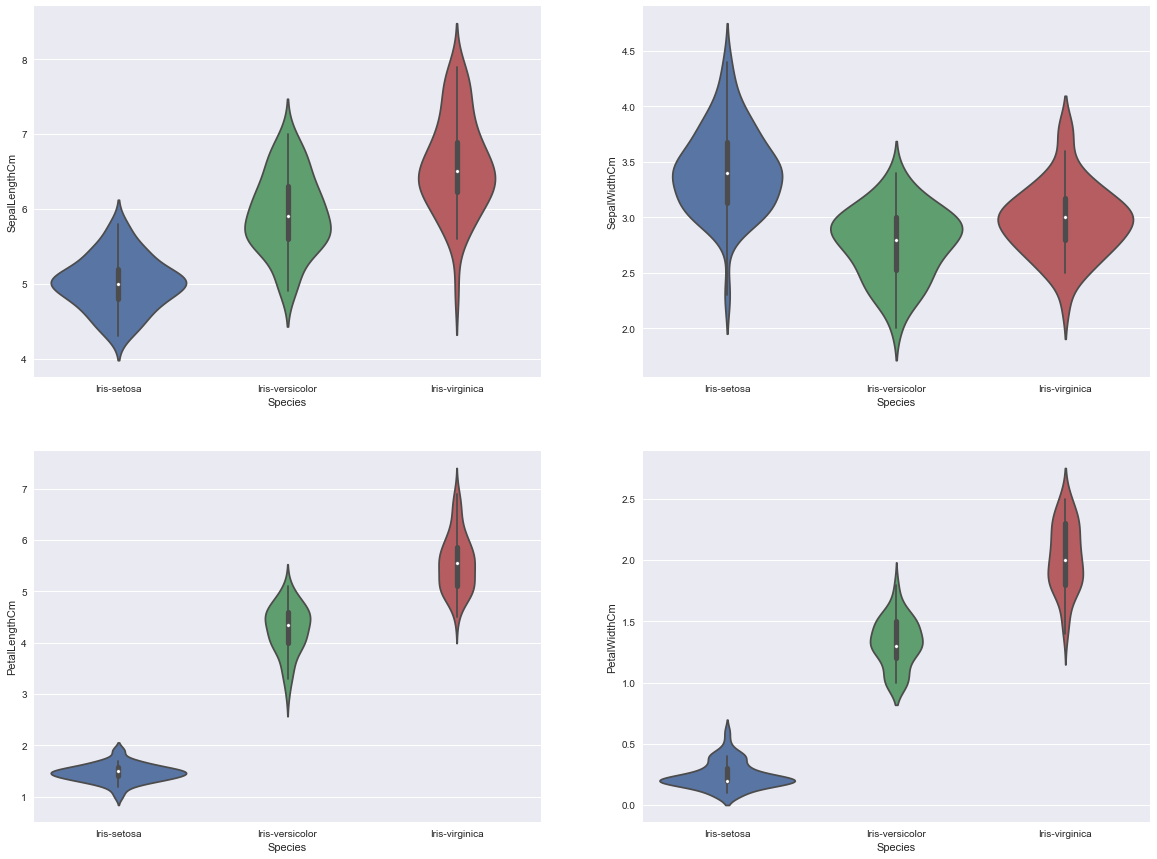

In [67]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y='SepalLengthCm',data=iris)

plt.subplot(2,2,2)
sns.violinplot(x="Species",y='SepalWidthCm',data=iris)


plt.subplot(2,2,3)
sns.violinplot(x="Species",y='PetalLengthCm',data=iris)


plt.subplot(2,2,4)
sns.violinplot(x="Species",y='PetalWidthCm',data=iris)

In [68]:
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics


In [75]:
feature_column=iris.columns.difference(["Species"])
feature_column

Index([u'PetalLengthCm', u'PetalWidthCm', u'SepalLengthCm', u'SepalWidthCm'], dtype='object')

In [82]:
train_x, test_x, train_y, test_y=train_test_split(iris[feature_column], iris["Species"], train_size=.7, random_state=123)

In [84]:
print train_x.shape, train_y.shape
print test_x.shape, test_y.shape

(105, 4) (105L,)
(45, 4) (45L,)


In [93]:
model=svm.SVC()
model.fit(train_x,train_y)
predection=model.predict(test_x)

print ("accuracy for SVM: " )
metrics.accuracy_score(predection,test_y)
    


accuracy for SVM: 


0.97777777777777775

In [96]:
model = LogisticRegression()
model.fit(train_x, train_y)
predection = model.predict(test_x)
print "Accuracy : " 
metrics.accuracy_score(predection,test_y)


Accuracy : 


0.97777777777777775

In [97]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
predection=model.predict(test_x)
metrics.accuracy_score(predection,test_y)

0.93333333333333335

In [113]:
xyz=[]
for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x, train_y)
    predection=model.predict(test_x)
    xyz.append(metrics.accuracy_score(predection,test_y))
xyz1=pd.DataFrame(xyz,index=range(1,11))
xyz1.columns=["KNN Accueacy Score"]
xyz1

,KNN Accueacy Score
1,0.911111
2,0.911111
3,0.955556
4,0.955556
5,0.977778
6,0.955556
7,0.977778
8,0.955556
9,0.955556
10,0.955556


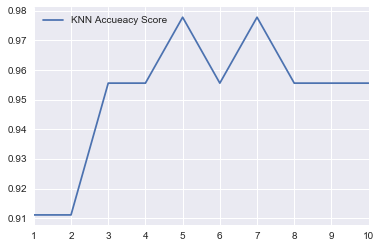

In [114]:
xyz1.plot()